## Notebook for prepping training data from SST snapi cubes!

In [47]:
import numpy as np
import matplotlib.pyplot as plt 
from astropy.io import fits
import pyana

In [49]:
imodel = pyana.fzread("/home/milic/data/Na_SST_specres/with_vt/inverted_nodes.f0")["data"]
imodel.shape
imodel = imodel.transpose(0,2,1)

In [50]:
# Temperature: 0, 1,2, 3
# vturb = 4
# vz = 5,6,7
# B = 8,9
# theta = 10

In [51]:
temperature = imodel[0:4]
vturb = imodel[4]
vlos = imodel[5:8]
B = imodel[8:10]
theta = imodel[10]

In [52]:
temphdu = fits.PrimaryHDU(temperature)
vturbhdu = fits.ImageHDU(vturb)
vloshdu = fits.ImageHDU(vlos)
Bhdu = fits.ImageHDU(B)
thetahdu = fits.ImageHDU(theta)

mylist = fits.HDUList([temphdu, vturbhdu, vloshdu, Bhdu, thetahdu])
mylist.writeto("full_training_set_out.fits", overwrite=True)


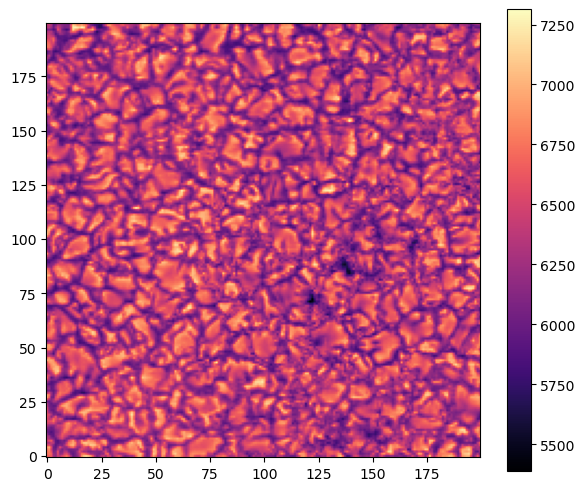

In [53]:
plt.figure(figsize=[7,6])
plt.imshow(temperature[3].T, cmap = 'magma', origin='lower')
plt.colorbar()

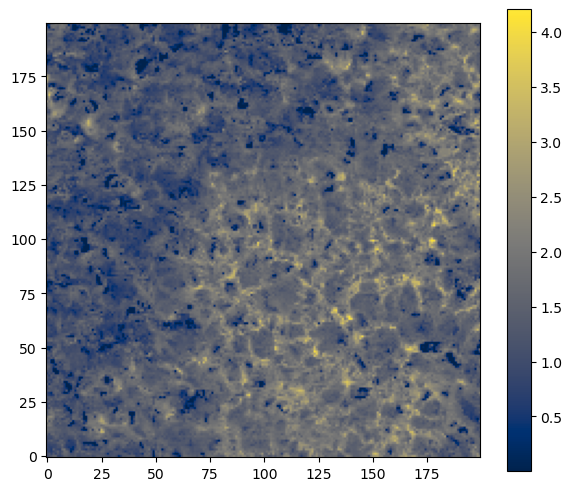

In [54]:
plt.figure(figsize=[7,6])
plt.imshow(vturb.T/1E5, cmap = 'cividis', origin='lower')
plt.colorbar()

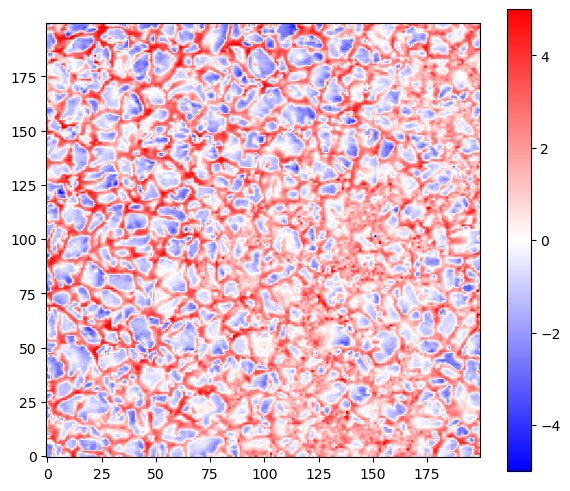

In [55]:
plt.figure(figsize=[7,6])
plt.imshow(vlos[2].T/-1E5, cmap = 'bwr', origin='lower', vmin = -5, vmax= 5)
plt.colorbar()

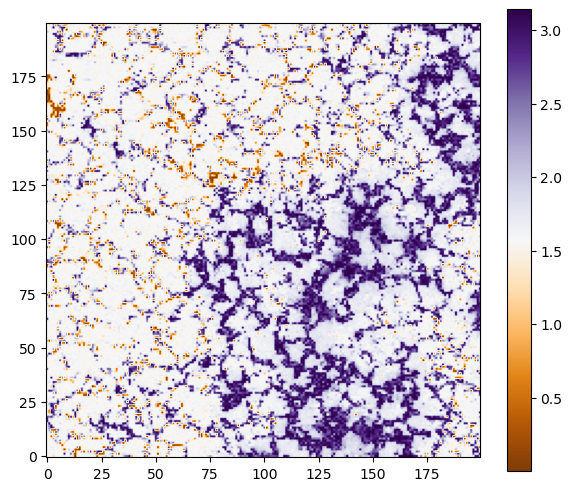

In [56]:
plt.figure(figsize=[7,6])
plt.imshow(theta.T, cmap = 'PuOr', origin='lower')
plt.colorbar()

In [57]:
stokes = pyana.fzread("/home/milic/data/Na_SST_specres/with_vt/cube_to_invert.f0")["data"]
stokes.shape

(200, 200, 4, 967)

In [58]:
#stokes_full = np.concatenate((stokes1, stokes2, stokes3, stokes4),axis=1)
#stokes_full.shape
stokes_full = np.concatenate((stokes[:,:,0,:], stokes[:,:,3,:]), axis=2)
stokes_full = stokes_full.reshape(200,200,2, 967)

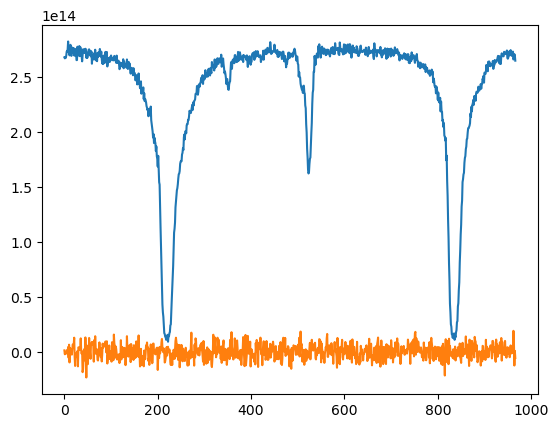

In [59]:
plt.plot(stokes[50,50,0])
plt.plot(stokes[50,50,3])

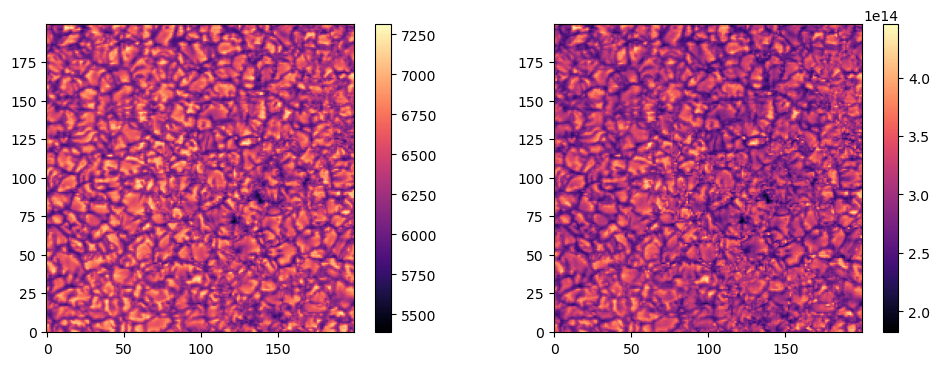

In [60]:
plt.figure(figsize=[12,4])
plt.subplot(121)
plt.imshow(temperature[3].T, cmap = 'magma', origin='lower')
plt.colorbar()
plt.subplot(122)
plt.imshow(stokes[:,:,0,0].T, cmap = 'magma', origin='lower')
plt.colorbar()

In [61]:
stokes = fits.PrimaryHDU(stokes_full)
stokes.writeto("full_training_set_in.fits",overwrite=True)